# <center>Problem Solving 04</center>

_Beka Modebadze 2019_ - https://github.com/bexxmodd/econ-papers-reproduction

## Replication of a paper published by Kevin L. Kliesen and John A. Tatom - "U.S. Manufacturing and the Importance of International Trade: It’s Not What You Think"

> #### Original paper, published by **_Federal Reserve Bank of St. Louis Review_** in 2013, you can download from [here](https://drive.google.com/file/d/1w13U4-m1C2k4XsXa1lE22B9Y1V4yKHCc/view?usp=sharing) and dataset can be downloaded from [here](https://drive.google.com/file/d/1puMYclm9oXwqzO0T5DHUTs9dOuWdO-NJ/view?usp=sharing)

In this session we work on paper that analyzes the factors affecting the growth rate of manufacturing sector in the United


Kliesen, Kevin L., and John A. Tatom. 2013. “U.S. Manufacturing and the Importance of International Trade: It’s Not What You Think” Federal Reserve Bank of St. Louis Review. 95(1), 27-49.

_**Abstract**: The public often gauges the strength of the U.S. economy by the performance of the manufacturing sector, especially by changes in manufacturing employment. When such employment declines, as has been the trend for many years, it is often assumed to be evidence of the slow death of U.S. manufacturing and an associated rise in imports. This article outlines key trends in U.S. manufacturing, especially the strong performance of manufacturing output and productivity, and their connection to both exports and imports. The authors use ordinary regression, causality, and cointegration analyses to provide empirical evidence for the positive role of imports in boosting manufacturing output. Policies to bolster exports at the expense of imports would significantly harm U.S. manufacturing._

------
## Part 1:

The variables and their description are as follows:

**<center>Annual Data (Kleiser2013)</center>**

Variable	|Year
----:|:----
ExptoChina	|Nominal values of U.S. export to China 
ExotoWorld	|Nominal value of total U.S. export
MANValAdded	|Manufacturing value added. Nominal value.
MANPriceIndex	|Manufacturing price index (2005=100)
GDPPriceIndex	|GDP price index (2005=100)
GoodsExp2005	|U.S. export of goods, billion dollars, real (2005 chained price index)
GoodsImp2005	|U.S. import of goods, billion dollars, real (2005 chained price index)
USGDPReal	|U.S. real GDP
MANRealInd	|U.S. Manufacturing production, indexed (2005=100)
DollarNom	|Nominal value of dollar (trade-weighted)
DollarReal	|Real value of dollar (trade-weighted)
OilNom	|Nominal oil price (Refiners’ acquisitions price)
FuelReal	|Real price of fuel
EquiptSoft	|Equipment and software fixed private investment
ExpReal	|Real goods export
ImpReal	|Real goods import
 


In [1]:
# importing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata('Kliesen2013.dta')
df.head()

,year,ExptoChina,ExptoWorld,MANValAdded,MANPriceIndex,GDPPriceIndex,GoodsEXP2005,GoodsIMP2005,USGDPReal,MANRealInd,DollarNom,DollarReal,OilNom,FuelReal,EquipSofInvR,EXPReal,IMPReal
0,1950,NaN,NaN,79.4,31.927,14.628,39.0,49.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,NaN,NaN,94.7,34.208,15.635,47.5,48.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,NaN,NaN,98.4,34.382,15.976,45.1,49.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,NaN,NaN,107.5,35.086,16.178,42.0,52.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,NaN,NaN,101.7,35.664,16.342,44.4,48.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our main variable of interest is manufacturing value-added <code>'MANValueAdded'</code>. It's a time series of values for manufacturing goods produced in the U.S.


To work with time series, we have to set the data as the “time series” and the variable that defines the time series is <code>'year'</code>

In [2]:
df = df.set_index(['MANValAdded','year'])
df.head(5)

,,ExptoChina,ExptoWorld,MANPriceIndex,GDPPriceIndex,GoodsEXP2005,GoodsIMP2005,USGDPReal,MANRealInd,DollarNom,DollarReal,OilNom,FuelReal,EquipSofInvR,EXPReal,IMPReal
MANValAdded,year,,,,,,,,,,,,,,,
79.4,1950,NaN,NaN,31.927,14.628,39.0,49.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94.7,1951,NaN,NaN,34.208,15.635,47.5,48.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98.4,1952,NaN,NaN,34.382,15.976,45.1,49.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107.5,1953,NaN,NaN,35.086,16.178,42.0,52.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101.7,1954,NaN,NaN,35.664,16.342,44.4,48.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# reset MANValAdded and year as regular columns so we can use them for the graph
df.reset_index(inplace=True)

(1950, 2011)

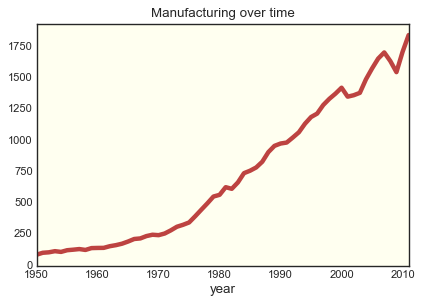

In [4]:
from matplotlib.pyplot import figure
plt.style.use('seaborn-white')
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['axes.facecolor'] = 'ivory'
plt.plot(df[['year']], df[['MANValAdded']], linewidth='4', color='firebrick', alpha=.85)
plt.title('Manufacturing over time')
plt.xlabel('year', fontsize=12)
plt.xlim(1950, 2011)

* **Even without mathematical analysis and just by looking at our plotted data we see that our data is non-stationary:**
    * Stationary means that process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean, and variance also do not change over time
    * In our case this means the mean and variance change over time, which makes it impossible to make a correct analysis. We need to make data stationery

-------
We use manufacturing price index <code>'MANPriceIndex'</code> to calculate the real value of manufacturing production.

In [5]:
df['RealMAN'] = df['MANValAdded'] / df['MANPriceIndex']
df.tail(10)

,MANValAdded,year,ExptoChina,ExptoWorld,MANPriceIndex,GDPPriceIndex,GoodsEXP2005,GoodsIMP2005,USGDPReal,MANRealInd,DollarNom,DollarReal,OilNom,FuelReal,EquipSofInvR,EXPReal,IMPReal,RealMAN
52,1355.5,2002,22127.700000,693101.4,99.736,92.192,762.7,1372.2,11553.0,87.6,126.82,110.11,24.02,93.2,93.089,100.119241,830.3,13.590880
53,1374.3,2003,28367.942859,724771.0,98.015,94.134,776.4,1439.9,11840.7,88.7,119.27,103.45,28.60,112.9,94.413,119.580990,851.4,14.021323
54,1482.7,2004,34427.772456,814874.7,97.745,96.784,842.6,1599.3,12263.8,91.1,113.76,98.82,36.91,126.9,96.852,131.024656,917.3,15.169062
55,1569.3,2005,41192.010123,901081.8,100.000,100.000,906.1,1708.0,12638.4,94.8,110.84,97.18,50.32,156.4,100.000,156.400000,995.6,15.693000
56,1648.4,2006,53673.008343,1025967.5,100.842,103.237,991.5,1809.1,12976.2,97.1,108.71,96.07,60.10,166.7,102.927,161.959447,1069.6,16.346364
57,1698.0,2007,62936.891576,1148198.7,100.328,106.231,1088.1,1856.1,13228.9,100.0,103.58,91.48,67.98,177.6,105.654,168.095860,1109.0,16.924488
58,1628.5,2008,69732.837543,1287442.0,102.192,108.565,1157.0,1784.8,13228.8,95.0,99.90,87.65,94.29,214.6,107.563,199.510984,1082.0,15.935690
59,1540.2,2009,69496.678611,1056043.0,106.681,109.732,1018.6,1506.0,12880.6,82.2,105.70,91.25,59.20,158.7,108.119,146.782712,916.3,14.437435
60,1701.9,2010,91880.613079,1278263.2,105.983,111.000,1164.9,1729.3,13248.2,86.6,102.07,87.18,76.70,185.8,109.193,170.157428,1056.1,16.058236
61,1837.0,2011,103878.600000,1480646.0,109.706,113.338,1251.7,1828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.744754


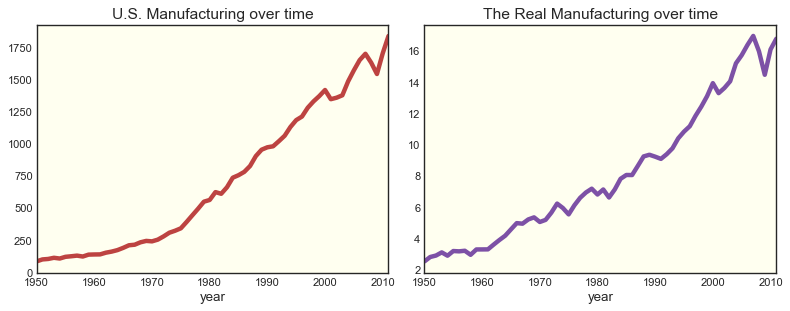

In [6]:
figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('seaborn-white')
plt.rcParams['axes.facecolor'] = 'ivory'

plt.subplot(1,2,1)
plt.plot(df[['year']], df[['MANValAdded']], linewidth='4', color='firebrick', alpha=.85)
plt.title('U.S. Manufacturing over time', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.xlim(1950, 2011)

plt.subplot(1,2,2)
plt.plot(df[['year']], df[['RealMAN']], linewidth='4', color='rebeccapurple', alpha=.85)
plt.title('The Real Manufacturing over time', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.xlim(1950, 2011)
plt.tight_layout()

* Even after we adjust manufacturing to the change in prices e.i inflation we see the trend, which means data is still not stationary. This means that value adds overtime and past influence the present thus to properly analyze the effect of the exports and imports on the manufacturing we need to de-trend data meaning make it stationary

----
But first, in many cases, the relationship between variables is a logarithmic type of relationship. This means that instead of looking at total values we need to analyze if the percentage change in export/import influenced the percentage change in manufacturing.


To make it clearer, by converting our values into log values we will see if and by how much the change in input (export or import) affects the change of the output (manufacturing)

In [7]:
df['ln_realMAN'] = np.log(df['RealMAN'])
df.head()

,MANValAdded,year,ExptoChina,ExptoWorld,MANPriceIndex,GDPPriceIndex,GoodsEXP2005,GoodsIMP2005,USGDPReal,MANRealInd,DollarNom,DollarReal,OilNom,FuelReal,EquipSofInvR,EXPReal,IMPReal,RealMAN,ln_realMAN
0,79.4,1950,NaN,NaN,31.927,14.628,39.0,49.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.486923,0.911046
1,94.7,1951,NaN,NaN,34.208,15.635,47.5,48.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.768358,1.018254
2,98.4,1952,NaN,NaN,34.382,15.976,45.1,49.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.861963,1.051508
3,107.5,1953,NaN,NaN,35.086,16.178,42.0,52.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.063900,1.119689
4,101.7,1954,NaN,NaN,35.664,16.342,44.4,48.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.851615,1.047886


(1950, 2011)

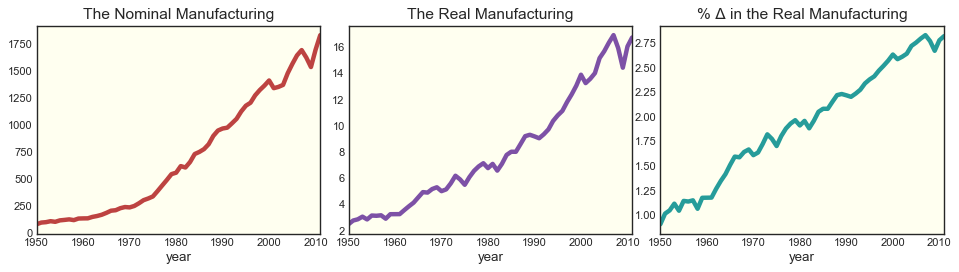

In [8]:
figure(num=None, figsize=(12, 3.5), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('seaborn-white')
plt.rcParams['axes.facecolor'] = 'ivory'

plt.subplot(1,3,1)
plt.plot(df[['year']], df[['MANValAdded']], linewidth='4', color='firebrick', alpha=.85)
plt.title('The Nominal Manufacturing', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.xlim(1950, 2011)

plt.subplot(1,3,2)
plt.plot(df[['year']], df[['RealMAN']], linewidth='4', color='rebeccapurple', alpha=.85)
plt.title('The Real Manufacturing', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.xlim(1950, 2011)
plt.tight_layout()

ax = plt.subplot(1,3,3)
plt.style.use('seaborn-white')
plt.rcParams['axes.facecolor'] = 'ivory'
plt.plot(df[['year']], df[['ln_realMAN']], linewidth='4', color='darkcyan', alpha=.85)
plt.title('% Δ in the Real Manufacturing', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.xlim(1950, 2011)

* What converting values into log values did was made exponential data into the linear model. In this case, it became more evident that the growth in manufacturing has a trend, it follows a clear path from past to present to the future and it's a non-stationary.

------

Now, based on the visual analysis we have to officially confirm the stationarity of the data. We “assume” that the problem is only with stochastic time trends. Regressions on time reveal this type of non-stationarity.


We run regressions of the natural log of real manufacturing on time and check to see if there is a “deterministic trend” by looking at the significance of the coefficient of time. The residual from the below regression is the “detrended data”.

In [9]:
import statsmodels.formula.api as smf

reg0 = smf.ols('ln_realMAN ~ year', data=df).fit()
print(reg0.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_realMAN   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     4612.
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           1.87e-58
Time:                        20:04:09   Log-Likelihood:                 82.003
No. Observations:                  62   AIC:                            -160.0
Df Residuals:                      60   BIC:                            -155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.6225      0.921    -65.813      0.0

Next to confirm the existance of the time series has a unit root, meaning it is non-stationary we will apply Augmented Dickey-Fuller test.
ADF is a one-sided test with left side being the rejection region.

ADF Test Statistics Looks like this:
> * **Null Hypothesis {H0}:** Data has a unit root (it's non stationary) and variable is time dependent
> * **Alternate Hypothesis {H1}:** Reject H0; Data has NO unit root; Data is staionary and not time dependant

In [10]:
# download the modul
from statsmodels.tsa.stattools import adfuller

# Run Augmented Dickey Fuller Test for the Ln of real manufacturing
X = df['ln_realMAN']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.700441
p-value: 0.846635
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


* Our regression and Augmented Dickey-Fuller test indeed confirmed that the time indeed influences the change in real manufacturing - meaning it is non-stationary

* To be more precise, our regression of manufacturing on time demonstrated that a single year contributes to the **3.16%** increase in real manufacturing.
    * <code>p-value</code> is close to **zero** which makes this variable statistically significant at 99% confidence interval
    * <code>adjusted R-squared</code> is as high as 0.987 which means our model explains change in the manufacturing by **98.7%**


* After testing with ADF:
    * <code>p-value</code> = **0.85** which is too high for the rejection of the null hypothesis.
 
---
Now in order to eliminate time's influance on the outcome we need to 'detrend' data to provide the precise and mathematically correct analysis.
The residual from the above regression is the “detrended data” we are going to use for further analysis.

In [11]:
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
# now run the regression
reg = LinearRegression()
x = df[['year']]
y = df[['ln_realMAN']]

# fitting the model
reg = reg.fit(x, y)

# creating yhat or the prediction line
yhat = reg.predict(x)

# we will extract residuals from our data by substracting predicted values from the actual values
res = df[['ln_realMAN']] - yhat
print(res)

    ln_realMAN
0    -0.058748
1     0.016875
2     0.018542
3     0.055137
4    -0.048252
..         ...
57    0.058577
58   -0.033209
59   -0.163531
60   -0.088720
61   -0.078443

[62 rows x 1 columns]


Text(1997, 2.2, 'Real MANF')

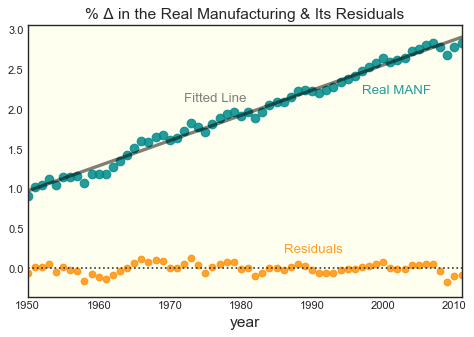

In [12]:
import seaborn as sns
plt.style.use('seaborn-white')
figure(num=None, figsize=(7, 4.5), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['axes.facecolor'] = 'ivory'
plt.scatter(df[['year']], df[['ln_realMAN']], color='darkcyan', alpha=.85, marker='o', s=60)
plt.plot(df[['year']], yhat, linewidth='3', color='black', alpha=.5)

sns.residplot(x, y, color="darkorange")
plt.title('% Δ in the Real Manufacturing & Its Residuals', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.xlim(1950, 2011)
plt.annotate('Residuals', (1986, .2), fontsize=12, color='darkorange', alpha=.85)
plt.annotate('Fitted Line', (1972, 2.1), fontsize=12, color='black', alpha=.5)
plt.annotate('Real MANF', (1997, 2.2), fontsize=12, color='darkcyan', alpha=.85)

Visualization helps again to see what is going on. When we plot residuals, it becomes clear that it has no time trend anymore and the data we have a stochastic process, meaning that plotted residuals follow each other, and we can use. Finally, our data is stationary, and we can start working on it to analyze the effect of exports and imports on manufacturing in the United States.

-------
## Part 2:

Assuming there is no other type of non-stationarity, we use the “detrended data” to build a model


First, let’s see if the real manufacturing production follows an AR(1) model

<div class="alert alert-success alert success" style="margin-top: 22px">
<font size = 4><strong>What is Autoregressive Model (AR)?:</strong></font>

An AR model predicts future behavior based on past behavior. It’s used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them. You only use past data to model the behavior, hence the name autoregressive (the Greek prefix auto– means “self.” ). The process is basically a linear regression of the data in the current series against one or more past values in the same series.

In an AR model, the value of the outcome variable (Y) at some point t in time is — like “regular” linear regression — directly related to the predictor variable (X). Where simple linear regression and AR models differ is that Y is dependent on X and previous values for Y.

AR(1) means that we'll use autoregressive model of the first lag.
<br>
<br>
<br>
<font size = 3><strong>What is Lag?:</strong></font>

A “lag” is a fixed amount of passing time; One set of observations in a time series is plotted (lagged) against a second, later set of data. The kth lag is the time period that happened “k” time points before time i. For example:
_Lag1(value in the year 2002) = value in the Year 2001_ and _Lag4(value in the year 2009) = value in the year 2005_.
So if the lag is 1, as our model will be, it's called a first-order lag and looks at the value of the previous year.
</div>

In [13]:
# we run the regression of manufacturing production on its lagged values
# first we need to extracted lag 1 value
df['ln_realMAN_l1'] = df[['ln_realMAN']].shift()
df['ln_realMAN_l1'].dropna
df['ln_realMAN_l1']

0          NaN
1     0.911046
2     1.018254
3     1.051508
4     1.119689
        ...   
57    2.794005
58    2.828762
59    2.768561
60    2.669824
61    2.776222
Name: ln_realMAN_l1, Length: 62, dtype: float64

In [14]:
# We do the regression and look at the coef. and adj.R^2
reg1 = smf.ols('ln_realMAN ~ ln_realMAN_l1', data=df).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_realMAN   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6351.
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           9.02e-62
Time:                        20:04:10   Log-Likelihood:                 91.997
No. Observations:                  61   AIC:                            -180.0
Df Residuals:                      59   BIC:                            -175.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0533      0.025      2.151

We see that the past one year transfers its memory by 98.8% to the present. This suggests that we have strong evidence of an AR(1) model being applicable. 

-------
**We check if higher values of lag can be applicable for our model (if further past then one year can be considered significant enough to add to our model)**

In [15]:
# We'll create lag(2) and Lag(3) values for our regression
df['ln_realMAN_l2'] = df[['ln_realMAN']].shift(2)
df['ln_realMAN_l3'] = df[['ln_realMAN']].shift(3)

# We regress with Lag(1) and Lag(2) and save coeficients for the summary table
reg2 = smf.ols('ln_realMAN ~ ln_realMAN_l1 + ln_realMAN_l2', data=df).fit()

# We regress with Lag(1), Lag(2) and Lag(3) and save coeficients for the summary table
reg3 = smf.ols('ln_realMAN ~ ln_realMAN_l1 + ln_realMAN_l2 + ln_realMAN_l3', data=df).fit()

In [16]:
# We instal package needed to produce the table with all the set of independent variables
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [17]:
# we build table charachteristics and plug regressions
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1, reg2, reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                        'Model 3'],
                            info_dict=info_dict,)

results_table.add_title('Table 1 - OLS Regressions')

print(results_table)

       Table 1 - OLS Regressions
                 Model 1 Model 2 Model 3
----------------------------------------
Intercept        0.05**  0.05*   0.06*  
                 (0.02)  (0.03)  (0.03) 
ln_realMAN_l1    0.99*** 0.92*** 0.91***
                 (0.01)  (0.13)  (0.13) 
ln_realMAN_l2            0.07    -0.08  
                         (0.13)  (0.18) 
ln_realMAN_l3                    0.16   
                                 (0.13) 
R-squared        0.99    0.99    0.99   
No. observations 61      60      59     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


* Here, by the guess we can say that 1-year lag can be the best number of lags as only the lag(1)'s coefficients shows to be statistically significant with 99% confidence interval in all three cases. However, this is not a conclusive statement and we need to investigate further by doing several tests.

--------

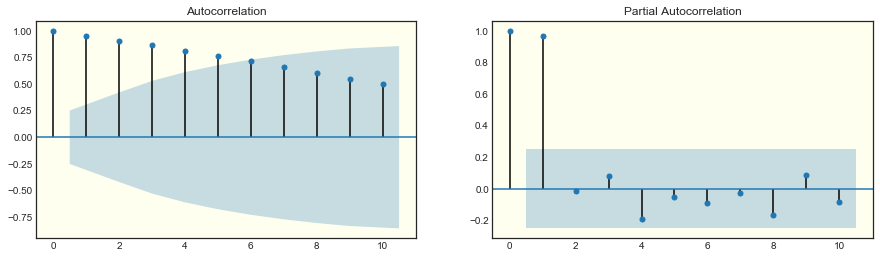

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(df.iloc[1:]['ln_realMAN'], lags=10, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(df.iloc[1:]['ln_realMAN'], lags=10, ax=axes[1])

* Here we see that we have autocorrelation. Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals. It is the same as calculating the correlation between two different time series, except autocorrelation uses the same time series twice: once in its original form and once lagged one or more time periods.
    * We set that the output value transfers from the past to the present with the decaying rate.
    * As we checked for the statistical significance of the several lagged values and found that lag(1) was most suitable with 99% significance to our model we proceed further employing lag(1) model to evaluate the influence of the export and import on the real manufacturing
    
----
## Part 3:
Next, we would like to take a look at the relationship between manufacturing production and import and export. We work on the “growth rates” of these variables. 


**First, we find the annual growth rate of manufacturing real value index <code>'MANRealInd'</code>, real import, and real export (<code>'EXPReal'</code> and <code>'IMPReal'</code>).**
to calculate the growth rate we will use this formula: ![alt text](https://i.imgur.com/3UnfhgY.jpg)
Where Yt is the current value and Yt-1 value of the previous year

In [19]:
df['MANRealInd_l1'] = df['MANRealInd'].shift()
df['EXPReal_1'] = df['EXPReal'].shift()
df['IMPReal_1'] = df['IMPReal'].shift()

df['MANRate'] = (df['MANRealInd'] - df['MANRealInd_l1']) / df['MANRealInd_l1']
df['EXPRate'] = (df['EXPReal'] - df['EXPReal_1']) / df['EXPReal_1']
df['IMPRate'] = (df['IMPReal'] - df['IMPReal_1']) / df['IMPReal_1']

df.tail()

,MANValAdded,year,ExptoChina,ExptoWorld,MANPriceIndex,GDPPriceIndex,GoodsEXP2005,GoodsIMP2005,USGDPReal,MANRealInd,...,ln_realMAN,ln_realMAN_l1,ln_realMAN_l2,ln_realMAN_l3,MANRealInd_l1,EXPReal_1,IMPReal_1,MANRate,EXPRate,IMPRate
57,1698.0,2007,62936.891576,1148198.7,100.328,106.231,1088.1,1856.1,13228.9,100.0,...,2.828762,2.794005,2.753215,2.719258,97.1,161.959447,1069.6,0.029866,0.037889,0.036836
58,1628.5,2008,69732.837543,1287442.0,102.192,108.565,1157.0,1784.8,13228.8,95.0,...,2.768561,2.828762,2.794005,2.753215,100.0,168.095860,1109.0,-0.050000,0.186888,-0.024346
59,1540.2,2009,69496.678611,1056043.0,106.681,109.732,1018.6,1506.0,12880.6,82.2,...,2.669824,2.768561,2.828762,2.794005,95.0,199.510984,1082.0,-0.134737,-0.264288,-0.153142
60,1701.9,2010,91880.613079,1278263.2,105.983,111.000,1164.9,1729.3,13248.2,86.6,...,2.776222,2.669824,2.768561,2.828762,82.2,146.782712,916.3,0.053528,0.159247,0.152570
61,1837.0,2011,103878.600000,1480646.0,109.706,113.338,1251.7,1828.6,NaN,NaN,...,2.818085,2.776222,2.669824,2.768561,86.6,170.157428,1056.1,NaN,NaN,NaN


Now we run a regression of manufacturing growth on export growth

In [20]:
# now run the regression
reg = LinearRegression()
x = df[['EXPRate']].dropna()
y = df[['MANRate']].dropna()

# fitting the model
reg = reg.fit(x, y)

# creating yhat or the prediction line
yhat = reg.predict(x)

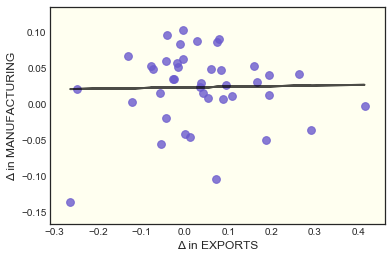

In [21]:
plt.scatter(x, y, color='slateblue', alpha=.8, marker='o', s=60)
plt.plot(x, yhat, linewidth='2', color='black', alpha=.7)
plt.xlabel('Δ in EXPORTS', fontsize=12)
plt.ylabel('Δ in MANUFACTURING', fontsize=12)
plt.show()

* Based on this graph there is no actuall impact of exports on manufacturing visible here. as the plotts are located all over the place without any significant pattern

Now we plot imports growth with manufacturing growth

In [22]:
# now run the regression
reg = LinearRegression()
x = df[['IMPRate']].dropna()

# fitting the model
reg = reg.fit(x, y)

# creating yhat or the prediction line
yhat = reg.predict(x)

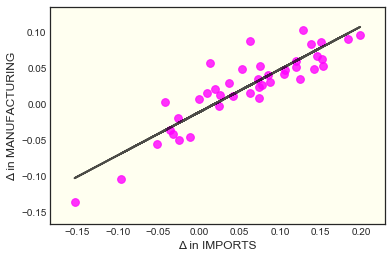

In [23]:
plt.scatter(x, y, color='magenta', alpha=.8, marker='o', s=60)
plt.plot(x, yhat, linewidth='2', color='black', alpha=.7)
plt.xlabel('Δ in IMPORTS', fontsize=12)
plt.ylabel('Δ in MANUFACTURING', fontsize=12)
plt.show()

Now we see here a perfect linear trend and the line fits perfectly. This is the evidence that actually with the increase in imports the real manufacturing icnreases

In [24]:
print(reg.coef_)

[[0.59601921]]


Approx. 1 percent increase in the imports, increases real manufacturing by 0.6%. This finding is similar to what was discovered in the original published paper!

This is an interesting finding. Conventional economics theory suggests that with the ease of the trade wit is expected that the exports (demand for domestic good) increases, thus increases the production (in our case manufacturing). However, we don't see any evidence that an increase in exports has a positive effect on manufacturing. Instead, data shows the evidence that increases in imports increases manufacturing. How so?

Now, this is my take on this case - As the US industry developed over time and became highly skilled and sophisticated. The country started producing more of high skilled artisan goods like jets, military arsenal, robotics, and other technologies and less of the intermediary goods. Here comes the competitive advantage in play. This allowed major US companies and foreign companies to produce intermediate and comparably inferior goods of equal value at a lower price. So other goods which are easy to produce got outsourced, intermediate goods which are used as a part of the production of highly technical and skilled goods got outsourced. So it is hard to tell if we have causation or correlation. Is it that imports stimulated manufacturing growth or manufacturing growth stimulated more imports?